In [709]:
# Импортируем необходимые библиотки.
# Загружаем датасеты, которые будем исследовать: 
# "orders" содержит информацию о заказах, "products" содержит информацию о продуктах, "returns" содержит информацию о я о возвратах.

import pandas as pd
import numpy as np
import plotly.graph_objects as go

orders = pd.read_csv ('data/orders.csv')
products = pd.read_csv('data/products.csv')
returns = pd.read_csv('data/returns.csv')

In [696]:
# Посмотрим, что содержится в датасете "orders":
orders.head()

,order_id,product_id,customer_id,order_date,status,quantity,unit_price,total_price
0,1,1,1,2023-10-25 11:21:13,Delivered,10,59.99,599.90
1,2,2,2,2024-06-06 00:01:54,Sent,14,26.99,377.86
2,3,2,3,2021-10-29 14:31:14,Delivered,3,26.99,80.97
3,4,4,3,2023-11-24 22:48:45,Delivered,6,11.99,71.94
4,5,2,4,2024-08-20 07:40:11,Delivered,7,26.99,188.93


In [697]:
# Изучим данные: посмотрим количество колонок и cтрок в датасете "orders":
orders.shape

(100010, 8)

In [698]:
# Посмотрим, какие типы данных в них содержатся:
orders.dtypes

order_id         int64
product_id       int64
customer_id      int64
order_date      object
status          object
quantity         int64
unit_price     float64
total_price    float64
dtype: object

In [710]:
# Приведем колонку "order_date" к типу данных datetime:
orders['order_date'] = pd.to_datetime(orders.order_date)
orders.dtypes

order_id                int64
product_id              int64
customer_id             int64
order_date     datetime64[ns]
status                 object
quantity                int64
unit_price            float64
total_price           float64
dtype: object

In [700]:
# Проверим наличие пропущенных значений в колонках:
orders.isna().sum()

order_id       0
product_id     0
customer_id    0
order_date     0
status         0
quantity       0
unit_price     0
total_price    0
dtype: int64

In [701]:
# Посмотрим описательную статистику: 
orders.describe()

,order_id,product_id,customer_id,order_date,quantity,unit_price,total_price
count,100010.000000,100010.000000,100010.000000,100010,100010.000000,100010.000000,100010.000000
mean,50005.500000,25012.633397,2311.610179,2022-06-22 02:36:22.554764800,10.517928,43.452047,459.440944
min,1.000000,1.000000,1.000000,2015-01-17 11:23:03,1.000000,0.000000,0.000000
25%,25003.250000,6741.000000,750.000000,2021-02-15 09:55:54,5.000000,11.990000,87.450000
50%,50005.500000,18568.000000,1788.000000,2023-02-11 17:33:28.500000,11.000000,19.980000,186.830000
75%,75007.750000,38419.250000,3482.000000,2024-04-22 21:53:02.500000,16.000000,35.990000,389.970000
max,100010.000000,99882.000000,8305.000000,2024-12-30 23:46:42,20.000000,8488.050000,135808.800000
std,28870.544548,22087.818406,1909.245309,NaN,5.769098,127.806809,1583.836656


In [702]:
# Проверим наличие дубликатов: 
orders.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
100005    False
100006    False
100007    False
100008    False
100009    False
Length: 100010, dtype: bool

**Рассчет общих метрик**

Период, за который исследуем данные - четвертый квартал 2024 года. Прежде всего, посмотрим сколько выручки приносил сервис ежедневно в этом периоде.<br>  Для этого найдем:
1. Выручку, полученную в каждый из дней.
2. Суммарную выручку на текущий день.
3. Прирост выручки, полученной в этот день, относительно значения выручки за предыдущий день.

In [711]:
# Исключаем из таблицы "orders" все заказы, которые были вовзращены пользователями.
# Для этого объединим таблицы "orders" и "returns" и исключим запиcи, которые встречаются в "returns":
not_in_returns = ~orders['order_id'].isin(returns['order_id'])
orders_without_return = orders[not_in_returns]

orders_without_return.head()

,order_id,product_id,customer_id,order_date,status,quantity,unit_price,total_price
1,2,2,2,2024-06-06 00:01:54,Sent,14,26.99,377.86
2,3,2,3,2021-10-29 14:31:14,Delivered,3,26.99,80.97
3,4,4,3,2023-11-24 22:48:45,Delivered,6,11.99,71.94
4,5,2,4,2024-08-20 07:40:11,Delivered,7,26.99,188.93
5,6,5,4,2023-01-07 22:57:32,Delivered,12,11.49,137.88


In [712]:
# В колонке order_date оставим только дату для дальнейшей группировки по дням:
orders_without_return['order_date'] = orders_without_return['order_date'].dt.date
orders_without_return['order_date'] = pd.to_datetime(df['order_date'])
orders_without_return

C:\Users\PC\AppData\Local\Temp\ipykernel_19252\3603095608.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PC\AppData\Local\Temp\ipykernel_19252\3603095608.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,order_id,product_id,customer_id,order_date,status,quantity,unit_price,total_price
1,2,2,2,2024-06-06,Sent,14,26.99,377.86
2,3,2,3,2021-10-29,Delivered,3,26.99,80.97
3,4,4,3,2023-11-24,Delivered,6,11.99,71.94
4,5,2,4,2024-08-20,Delivered,7,26.99,188.93
5,6,5,4,2023-01-07,Delivered,12,11.49,137.88
...,...,...,...,...,...,...,...,...
100003,100004,12401,1847,2024-05-20,Delivered,11,9.13,100.43
100004,100005,1696,2940,2024-03-19,Delivered,2,9.69,19.38
100006,100007,25787,5040,2024-07-01,Delivered,18,76.20,1371.60
100007,100008,84542,5531,2023-06-21,Delivered,1,36.99,36.99


In [713]:
# Сгруппируем данные по дням и посчитаем выручку, полученную за каждый день:
revenue_by_date = orders_without_return.query('status == "Delivered" and order_date >= "2024-10-01" and order_date <= "2024-12-31"') \
                    .groupby ('order_date', as_index=False) \
                    .agg({'total_price' : 'sum'}) \
                    .rename(columns = {'total_price':'revenue'}) \
                    .sort_values(by='order_date')
# Найдем накопленную выручку:
revenue_by_date['cumulative_revenue'] = revenue_by_date['revenue'].cumsum()

# Найдем прирост выручки относительно значения выручки за предыдущий день:
revenue_by_date['revenue_change'] = round(revenue_by_date['revenue'].pct_change() * 100,2)

revenue_by_date

,order_date,revenue,cumulative_revenue,revenue_change
0,2024-10-01,3655.94,3655.94,NaN
1,2024-10-02,9913.68,13569.62,171.17
2,2024-10-03,6032.50,19602.12,-39.15
3,2024-10-04,10818.80,30420.92,79.34
4,2024-10-05,3831.43,34252.35,-64.59
...,...,...,...,...
86,2024-12-26,29640.69,1053563.11,45.43
87,2024-12-27,18979.94,1072543.05,-35.97
88,2024-12-28,55180.02,1127723.07,190.73
89,2024-12-29,18598.13,1146321.20,-66.30


In [714]:
# Посмотрим среднее и медианное значение выручка за квартал:
revenue_by_date.describe()

,order_date,revenue,cumulative_revenue,revenue_change
count,91,91.000000,9.100000e+01,90.000000
mean,2024-11-15 00:00:00,12894.995275,5.037063e+05,33.691222
min,2024-10-01 00:00:00,3655.940000,3.655940e+03,-76.320000
25%,2024-10-23 12:00:00,6939.090000,2.395416e+05,-38.560000
50%,2024-11-15 00:00:00,10902.670000,4.853259e+05,-7.755000
75%,2024-12-07 12:00:00,16590.135000,7.262198e+05,80.172500
max,2024-12-30 00:00:00,55180.020000,1.173445e+06,649.190000
std,NaN,8194.209781,3.121320e+05,111.559875


D:\anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



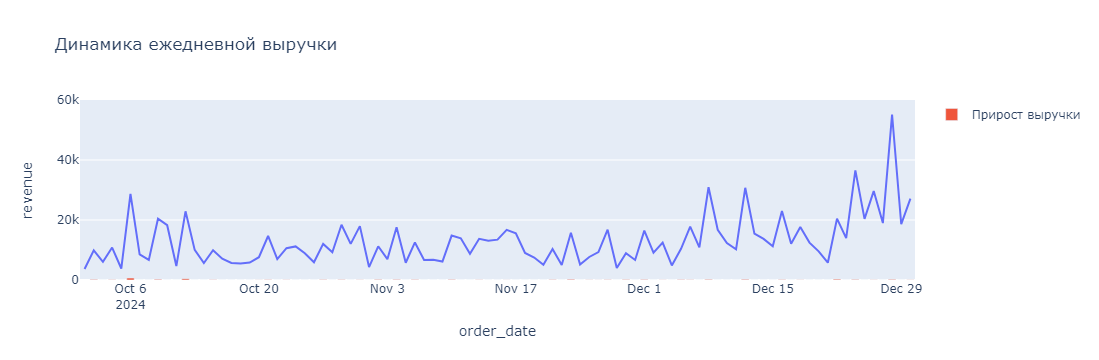

In [715]:
# Построим график, отражающий динамику рассчитанных показателей:
# Создание линейного графика для revenue
fig = px.line(revenue_by_date, x='order_date', y='revenue', title='Динамика ежедневной выручки')
# Добавление столбчатой диаграммы для revenue_change
fig.add_bar(x=revenue_by_date['order_date'], y=revenue_by_date['revenue_change'], name='Прирост выручки')
fig.update_yaxes(range=[0, 60000])
# Отображение графика
fig.show()

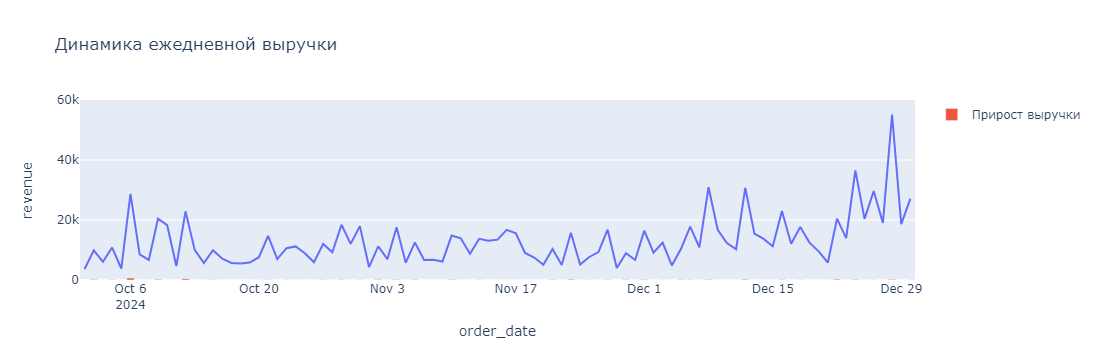

D:\anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



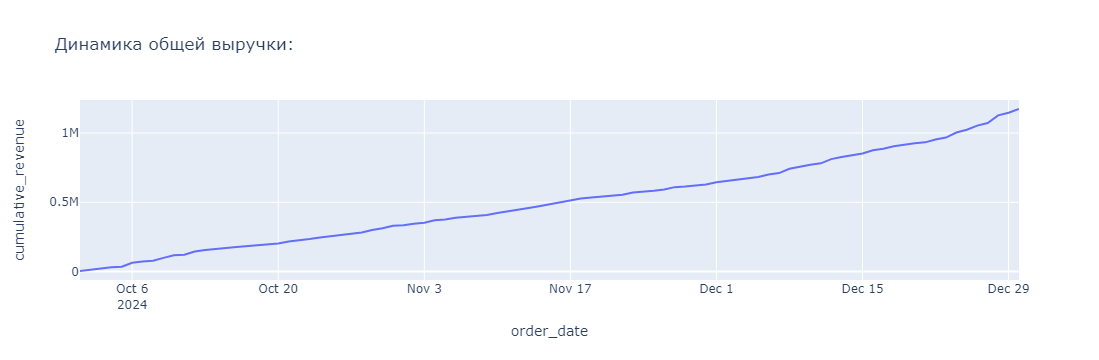

In [716]:
# Построим график, отражающий динамику рассчитанных показателей:
# Создание линейного графика для cumulative_revenue
fig = px.line(revenue_by_date, x='order_date', y='cumulative_revenue', title='Динамика общей выручки:')
# Отображение графика
fig.show()

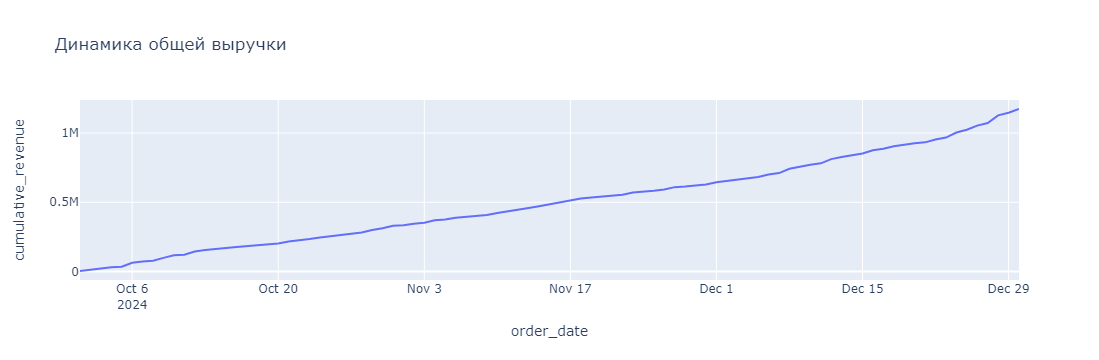

**Расчет метрик по продуктам**

Посмотрим, какие товары пользуются наибольшим спросом и принесли сервису основной доход в четвертом квартале 2024 г.<br>
Для этого найдем: 
1. Суммарную выручку, полученную от продажи каждого товара за период. 
2. Долю выручки от продажи товара в общей выручке, полученной за период.
3. Суммарную выручку, полученную от продажи категорий товаров за период.
4. Долю выручки от продажи категории товара в общей выручке, полученной за период.

In [717]:
# Сгруппируем таблицу по товарам и найдем выручку по каждому:
revenue_by_product = orders_without_return.query('status == "Delivered" and order_date >= "2024-10-01" and order_date <= "2024-12-31"') \
                        .groupby ('product_id', as_index=False) \
                        .agg({'total_price' : 'sum'}) \
                        .rename(columns = {'total_price':'revenue'})
# Присоединим таблицу "products", чтобы получить наименования товаров:
revenue_by_product = revenue_by_product.query('revenue > 0') \
                        .merge(products, on='product_id', how='inner')
# Оставим только нужные столбцы:
revenue_by_product = revenue_by_product[['product_name', 'category', 'revenue']] \
                        .sort_values('revenue', ascending=False)
# Посчитаем общую выручку за четвертый квартал:
revenue_by_product['total_revenue'] =  round(orders_without_return.query('status == "Delivered" and order_date >= "2024-10-01" and order_date <= "2024-12-31"') \
                        .total_price.sum(),2)
# Найдем долю выручки 
revenue_by_product['share_in_revenue'] = round(revenue_by_product.revenue/revenue_by_product.total_revenue * 100, 5)
revenue_by_product

,product_name,category,revenue,total_revenue,share_in_revenue
1217,Nikon Z 7II | Ultra-high Resolution Full-Frame...,Camera & Photo,29969.50,1173444.57,2.55398
1689,"HP Envy Business Laptop, 17.3"" FHD Touchscreen...",Computers & Tablets,18197.82,1173444.57,1.55080
656,EARTEC UL5S 5-Person Full Duplex Wireless Inte...,Office Electronics,17480.00,1173444.57,1.48963
890,"Panasonic Toughbook CF-19 MK7, i5-3340M 2.70GH...",Computers & Tablets,14399.82,1173444.57,1.22714
1572,LG 14Z90R-N.APC5U1 14'' Gram Laptop with Windo...,Computers & Tablets,13885.12,1173444.57,1.18328
...,...,...,...,...,...
1381,Capri Tools 10 mm x 11 mm Super-Thin Open End ...,Industrial Power & Hand Tools,7.19,1173444.57,0.00061
1418,Maxell EB-95 Stereo Earphone,Headphones & Earbuds,7.17,1173444.57,0.00061
1361,Star Trek Spock Soap - Made in the USA,Skin Care Products,5.95,1173444.57,0.00051
788,"Embroidery Floss 100 Skeins Embroidery Thread,...",Needlework Supplies,4.95,1173444.57,0.00042


**Анализ популярности продуктов**

In [718]:
# Посмотрим на ТОП-10 товаров:
successful_product = revenue_by_product.product_name.tolist()[:10]
',  '.join([str(product_name) for product_name in successful_product])

'Nikon Z 7II | Ultra-high Resolution Full-Frame mirrorless Stills/Video Camera | Nikon USA Model,  HP Envy Business Laptop, 17.3" FHD Touchscreen Display, Intel Core i7-1260P Processor, 64GB RAM, 2TB SSD, Wi-Fi 6, Backlit Keyboard, SD Card Reader, HDMI, Webcam, Windows 11 Pro, Silver,  EARTEC UL5S 5-Person Full Duplex Wireless Intercom with 5 Ultralite Single Ear Headsets,  Panasonic Toughbook CF-19 MK7, i5-3340M 2.70GHz, 10.1 XGA Touchscreen, 16GB, 1 TB SSD, Windows 10 Pro, WiFi, Bluetooth, Backlit Keyboard (Renewed),  LG 14Z90R-N.APC5U1 14\'\' Gram Laptop with Windows 11 Pro, 13th Gen Intel® Core™ i5 Processors, with 512 GB Hard Drive & 8 GB LPDDR5 RAM,  Nikon AF-S FX NIKKOR 28-300mm f/3.5-5.6G ED Vibration Reduction Zoom Lens with Auto Focus for Nikon DSLR Cameras (Renewed),  19 Degree Continental Expandable 4 Wheeled Carry-On - Black,  Goulds GT10 Irri-Gator self Priming Centrifugal Pump - 1 hp,  Ferragamo Womens Swiss Made Watch Idillio Collection,  TENLOG TL-D3 Pro Independent Du

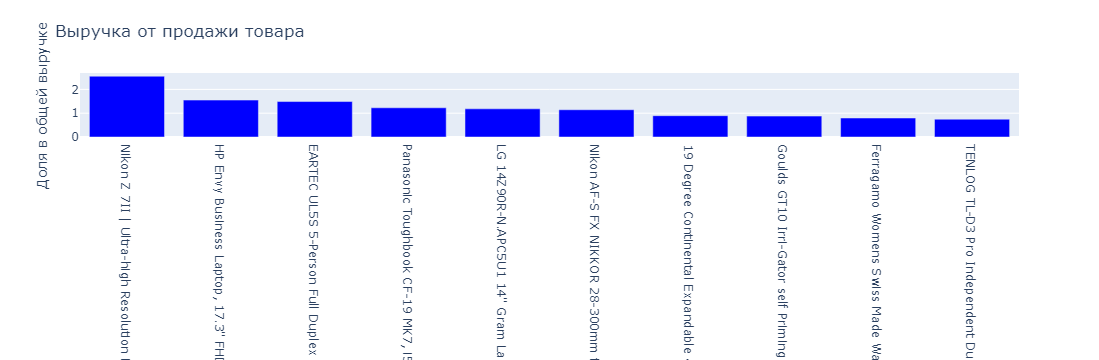

In [719]:
# Построим график, отражающий динамику рассчитанных показателей:
x_data = revenue_by_product['product_name'][:10]
y_data = revenue_by_product['share_in_revenue']

fig = {
    "data": [{"type": "bar",
              "x": x_data,
              "y": y_data,
              "marker": {"color": "blue"}
              }],
    "layout": {"title": {"text": "Выручка от продажи товара"},
               "yaxis": {"title": "Доля в общей выручке"}
              }}
pio.show(fig)

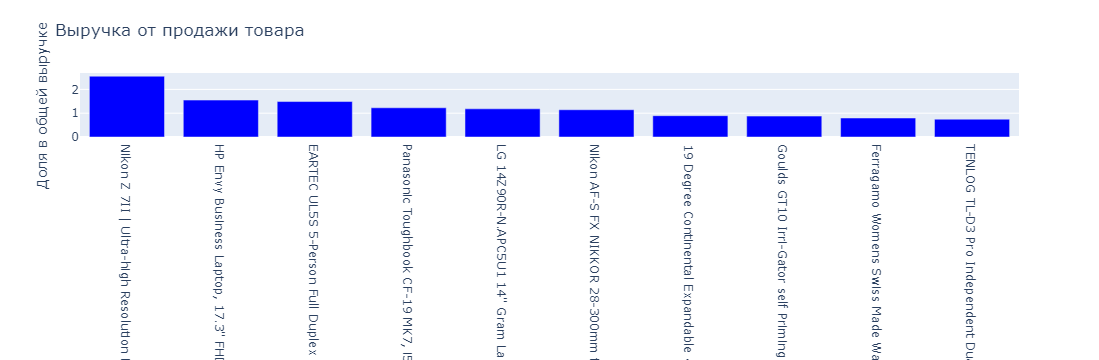

In [594]:
# Аналогично посмотрим, какие категории пользуются наибольшим спросом.Для этого найдем: 
# 1) Суммарную выручку, полученную от продажи товаров категории в 4-м квартале 2024 г.
# 2) Долю выручки от продажи этого товара в общей выручке за 4-й квартал 2024 г.

revenue_by_category = orders_without_return.query('status == "Delivered" and order_date >= "2024-10-01" and order_date <= "2024-12-31"') \
                        .merge(products, on='product_id', how='inner') \
                        .groupby ('category', as_index=False) \
                        .agg({'total_price' : 'sum'}) \
                        .rename(columns = {'total_price':'revenue'})
revenue_by_category = revenue_by_category.query('revenue > 0') \
                        .sort_values('revenue', ascending=False)

revenue_by_category['total_revenue'] =  round(orders.query('status == "Delivered" and order_date >= "2024-10-01" and order_date <= "2024-12-31"') \
                        .total_price.sum(),2)
revenue_by_category['share_in_revenue'] = round(revenue_by_category.revenue/revenue_by_category.total_revenue * 100, 5)

revenue_by_category

,category,revenue,total_revenue,share_in_revenue
51,Computers & Tablets,78936.66,1329035.74,5.93939
38,Camera & Photo,52301.76,1329035.74,3.93532
128,Men's Shoes,32744.49,1329035.74,2.46378
138,Office Electronics,29149.26,1329035.74,2.19326
8,Automotive Performance Parts & Accessories,28774.05,1329035.74,2.16503
...,...,...,...,...
49,Computer Servers,122.64,1329035.74,0.00923
203,Video Projectors,74.95,1329035.74,0.00564
149,Personal Care Products,69.58,1329035.74,0.00524
23,Baby Stationery,65.94,1329035.74,0.00496


In [595]:
# Посмотрим на ТОП-10 категорий товаров:
successful_category	 = revenue_by_category.category.tolist()[:10]
',  '.join([str(category) for category in successful_category])

"Computers & Tablets,  Camera & Photo,  Men's Shoes,  Office Electronics,  Automotive Performance Parts & Accessories,  Men's Watches,  Men's Accessories,  Women's Handbags,  Home Storage & Organization,  Men's Clothing"

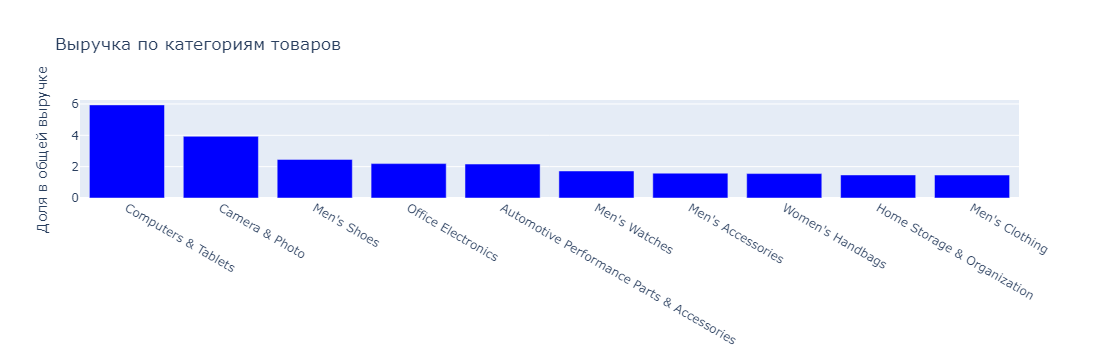

In [596]:
# Построим график, отражающий динамику рассчитанных показателей:

x_data = revenue_by_category['category'][:10]
y_data = revenue_by_category['share_in_revenue']

fig = {
    "data": [{"type": "bar",
              "x": x_data,
              "y": y_data,
              "marker": {"color": "blue"}
              }],
    "layout": {"title": {"text": "Выручка по категориям товаров"},
               "yaxis": {"title": "Доля в общей выручке"}
              }}
pio.show(fig)

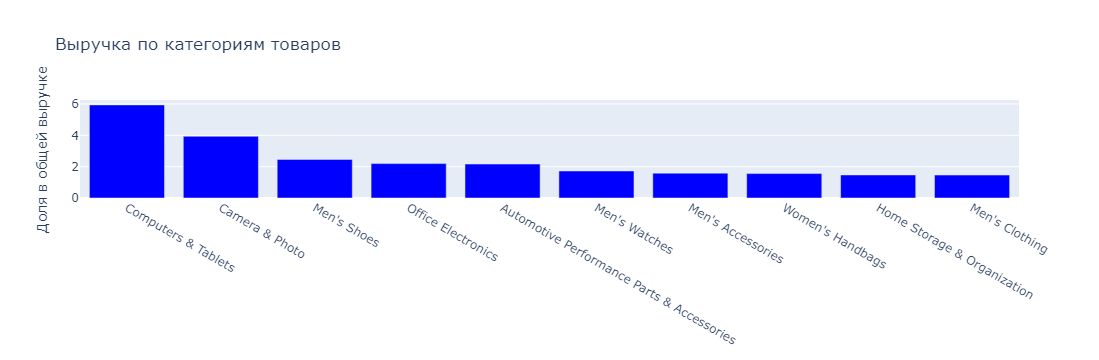

**Метрики вовлеченности пользователей**

Посчитаем количество уникальных клиентов за четвертый квартал:
1. DAU (daily active users) – число уникальных пользователей за день.
2. WAU (weekly active users) – число уникальных пользователей за неделю.
3. MAU (monthly active users) – число уникальных пользователей за месяц.
4. Количество заказов на каждого клиента за четвертый квартал.

In [720]:
# DAU (daily active users):

DAU = orders_without_return.query('status == "Delivered" and order_date >= "2024-10-01" and order_date <= "2024-12-31"') \
                    .groupby ('order_date', as_index=False) \
                    .agg({'customer_id' : 'nunique'}) \
                    .rename(columns = {'customer_id':'dau'}) \
                    .sort_values('order_date')
DAU.head()

,order_date,dau
0,2024-10-01,22
1,2024-10-02,19
2,2024-10-03,21
3,2024-10-04,35
4,2024-10-05,16


In [721]:
# WAU (weekly active users):

WAU = orders_without_return.query('status == "Delivered" and order_date >= "2024-09-30" and order_date <= "2024-12-29"') \
                .groupby(pd.Grouper(key='order_date', freq='W')) \
                .agg({'customer_id': 'nunique'}) \
                .rename(columns = {'customer_id':'wau'}) \
                .reset_index()
WAU.head()

,order_date,wau
0,2024-10-06,155
1,2024-10-13,164
2,2024-10-20,146
3,2024-10-27,160
4,2024-11-03,183


In [651]:
# MAU (monthly active users):

orders_without_return['month'] = orders_without_return['order_date'].dt.to_period('M')
MAU = orders_without_return.query('status == "Delivered" and order_date >= "2024-10-01" and order_date <= "2024-12-31"') \
                .groupby('month') \
                .agg({'customer_id': 'nunique'}) \
                .rename (columns={'customer_id':'mau'}) \
                .reset_index()
MAU.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_19252\620524259.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,month,mau
0,2024-10,629
1,2024-11,612
2,2024-12,704


D:\anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



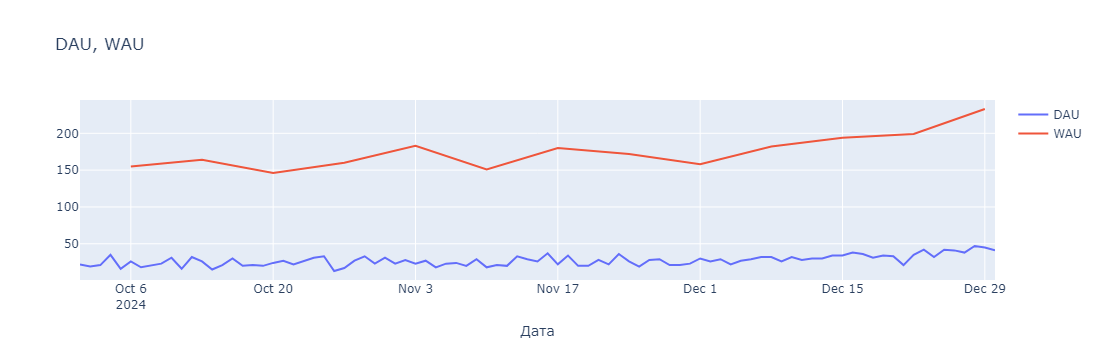

In [722]:
# Построим график, отражающий динамику рассчитанных показателей:
fig = go.Figure()

# Добавление линии для DAU
fig.add_trace(go.Scatter(x=DAU['order_date'], y=DAU['dau'], mode='lines', name='DAU'))

# Добавление линии для WAU
fig.add_trace(go.Scatter(x=WAU['order_date'], y=WAU['wau'], mode='lines', name='WAU'))

# Настройка макета графика
fig.update_layout(
    title='DAU, WAU', 
    xaxis_title='Дата',  
)

# Отображение графика
fig.show()

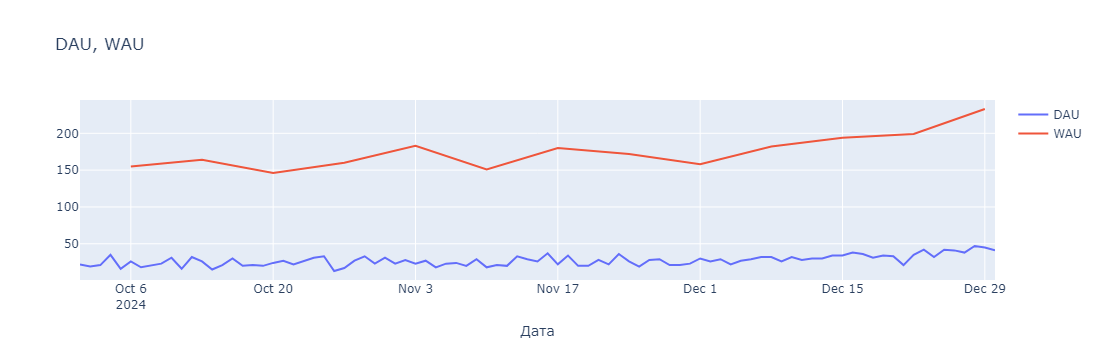

In [573]:
# Посчитаем количество заказов на каждого клиента за четвертый квартал:

orders_per_user = orders_without_return.query('status == "Delivered" and order_date >= "2024-10-01" and order_date <= "2024-12-31"') \
                    .groupby ('customer_id', as_index=False) \
                    .agg({'order_id' : 'count'}) \
                    .rename(columns = {'order_id':'number_of_orders'}) \
                    .sort_values('number_of_orders', ascending = False)
orders_per_user

,customer_id,number_of_orders
488,1272,11
633,1734,10
300,767,10
208,527,10
304,785,10
...,...,...
654,1801,1
652,1789,1
651,1784,1
650,1782,1


In [652]:
orders_per_user.describe()

,customer_id,number_of_orders
count,1554.000000,1554.000000
mean,2675.141570,1.645431
std,2000.508891,1.392102
min,2.000000,1.000000
25%,959.500000,1.000000
50%,2285.500000,1.000000
75%,4046.250000,2.000000
max,8257.000000,11.000000


**Платежные метрики**

На основе данных о выручке, рассчитаем  несколько относительных показателей, которые покажут, сколько в среднем потребители готовы платить за услуги нашего сервиса доставки. Остановимся на следующих метриках:
1. ARPU (Average Revenue Per User) — средняя выручка на одного пользователя за определённый период.
2. ARPPU (Average Revenue Per Paying User) — средняя выручка на одного платящего пользователя за определённый период.
3. AOV (Average Order Value) — средний чек, или отношение выручки за определённый период к общему количеству заказов за это же время.

In [664]:
# Рассчитаем ARPU за каждый день четвертого квартала 2024 года:

# посчитаем выручку и накопленную выручку за каждый день:
revenue_by_date = orders_without_return.query('status == "Delivered" and order_date >= "2024-10-01" and order_date <= "2024-12-31"') \
                    .groupby ('order_date', as_index=False) \
                    .agg({'total_price' : 'sum'}) \
                    .rename(columns = {'total_price':'revenue'}) \
                    .sort_values('order_date')
revenue_by_date['cumulative_revenue'] = revenue_by_date['revenue'].cumsum()

# посчитаем количество пользователей и количество пользователей нарастающим итогом в день:
users_by_day = orders_without_return.query('order_date >= "2024-10-01" and order_date <= "2024-12-31"') \
                .groupby ('order_date', as_index=False) \
                .agg({'customer_id':'nunique'}) \
                .rename(columns = {'customer_id':'users'})
users_by_day['cumulative_users'] = users_by_day['users'].cumsum()

# Соединим табоицы и надйем ARPU:
ARPU = users_by_day.merge(revenue_by_date, on='order_date')
ARPU['arpu'] = round(ARPU['revenue'] / ARPU['users'],2)
ARPU['running_arpu'] = round(arpu['cumulative_revenue'] / ARPU['cumulative_users'],2)
ARPU

,order_date,users,cumulative_users,revenue,cumulative_revenue,arpu,running_arpu
0,2024-10-01,88,88,3655.94,3655.94,41.54,41.54
1,2024-10-02,96,184,9913.68,13569.62,103.27,73.75
2,2024-10-03,92,276,6032.50,19602.12,65.57,71.02
3,2024-10-04,96,372,10818.80,30420.92,112.70,81.78
4,2024-10-05,84,456,3831.43,34252.35,45.61,75.11
...,...,...,...,...,...,...,...
86,2024-12-26,132,8992,29640.69,1053563.11,224.55,117.17
87,2024-12-27,124,9116,18979.94,1072543.05,153.06,117.66
88,2024-12-28,126,9242,55180.02,1127723.07,437.94,122.02
89,2024-12-29,131,9373,18598.13,1146321.20,141.97,122.30


In [665]:
# Рассчитаем ARPPU за каждый день четвертого квартала 2024 года:

# посчитаем выручку, накопленную выручку, платящих пользователй и платящих пользователей накопленным итогом за каждый день:
ARPPU = orders_without_return.query('status == "Delivered" and order_date >= "2024-10-01" and order_date <= "2024-12-31"') \
                    .groupby ('order_date', as_index=False) \
                    .agg({'total_price' : 'sum', 'customer_id':'nunique'}) \
                    .rename(columns = {'total_price':'revenue','customer_id':'paying_users' }) \
                    .sort_values('order_date')

ARPPU['cumulative_revenue'] = revenue_by_date2['revenue'].cumsum()
ARPPU['cumulative_paying_users'] = revenue_by_date2['paying_users'].cumsum()

ARPPU['arppu'] = round(ARPPU['revenue'] / ARPPU['paying_users'],2)
ARPPU['running_arppu'] = round(ARPPU['cumulative_revenue'] / ARPPU['cumulative_paying_users'],2)
ARPPU

,order_date,revenue,paying_users,cumulative_revenue,cumulative_paying_users,arppu,running_arppu
0,2024-10-01,3655.94,22,3935.74,23,166.18,171.12
1,2024-10-02,9913.68,19,15167.46,48,521.77,315.99
2,2024-10-03,6032.50,21,21276.89,70,287.26,303.96
3,2024-10-04,10818.80,35,32493.64,107,309.11,303.68
4,2024-10-05,3831.43,16,37677.40,125,239.46,301.42
...,...,...,...,...,...,...,...
86,2024-12-26,29640.69,41,1185663.27,2569,722.94,461.53
87,2024-12-27,18979.94,38,1207436.87,2612,499.47,462.27
88,2024-12-28,55180.02,47,1266878.50,2667,1174.04,475.02
89,2024-12-29,18598.13,45,1286791.19,2716,413.29,473.78


In [666]:
# Рассчитаем средний чек заказа за четвертый квартал - AOV:

AOV = orders_without_return.query('status == "Delivered" and order_date >= "2024-10-01" and order_date <= "2024-12-31"') \
        .groupby ('order_date', as_index=False) \
        .agg({'total_price' : 'sum', 'order_id':'nunique'}) \
        .rename(columns = {'total_price':'revenue','order_id':'orders' }) \
        .sort_values('order_date')

AOV['aov'] = round(AOV['revenue'] / AOV['orders'],2)
AOV

,order_date,revenue,orders,aov
0,2024-10-01,3655.94,22,166.18
1,2024-10-02,9913.68,19,521.77
2,2024-10-03,6032.50,21,287.26
3,2024-10-04,10818.80,35,309.11
4,2024-10-05,3831.43,16,239.46
...,...,...,...,...
86,2024-12-26,29640.69,44,673.65
87,2024-12-27,18979.94,38,499.47
88,2024-12-28,55180.02,50,1103.60
89,2024-12-29,18598.13,48,387.46


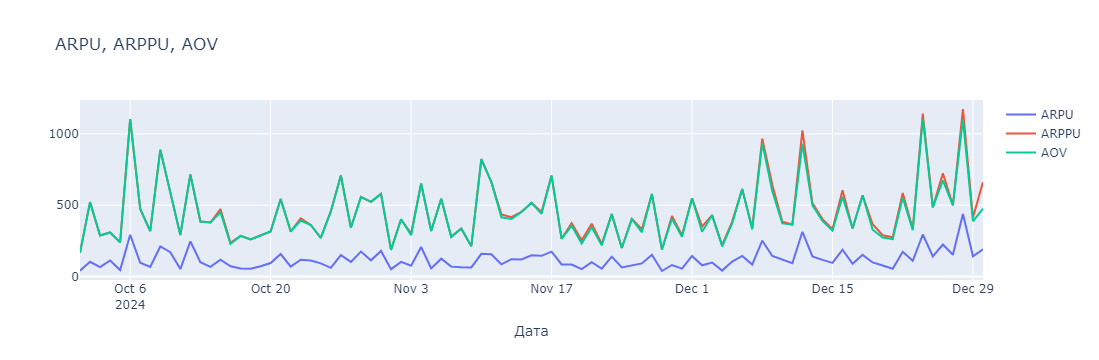

In [723]:
# Построим график, отражающий динамику рассчитанных показателей:
fig = go.Figure()

# Добавление линии для ARPU
fig.add_trace(go.Scatter(x=ARPU['order_date'], y=ARPU['arpu'], mode='lines', name='ARPU'))

# Добавление линии для ARPPU
fig.add_trace(go.Scatter(x=ARPPU['order_date'], y=ARPPU['arppu'], mode='lines', name='ARPPU'))

# Добавление линии для AOV
fig.add_trace(go.Scatter(x=AOV['order_date'], y=AOV['aov'], mode='lines', name='AOV'))

# Настройка макета графика
fig.update_layout(
    title='ARPU, ARPPU, AOV',
    xaxis_title='Дата',  
)

#Отображение графика
fig.show()

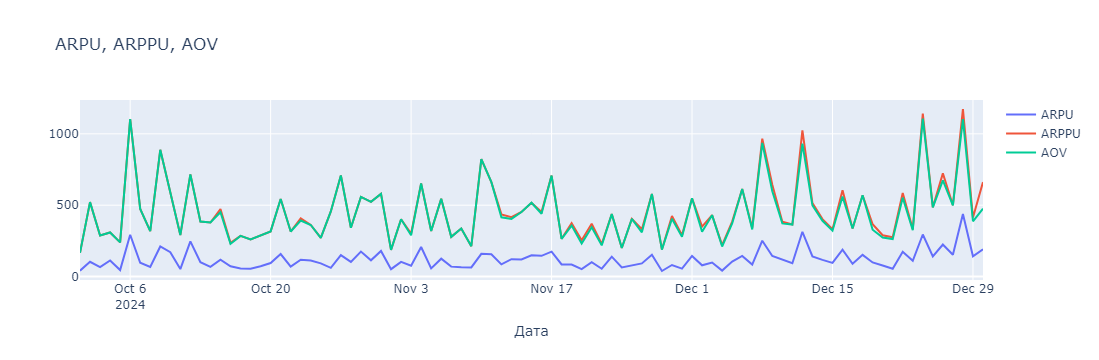

**Метрики эффективности обслуживания клиентов**

Оценим количество заказов, которые были возвращены клиентами, по каким причинам товары возвращали чаще всего. Для этого найдем:
1. Число успешных аказов.
2. Число возвращенных заказов.
3. Долю возвращенных заказов в общем числе заказов (cancel rate).
4. Доля различных статусов возвратов в общем количестве возвращенных заказов.

In [691]:
# Число успешных заказов:
successful_order_count = orders_without_return.query('status == "Delivered" and "2024-10-01" <= order_date <= "2024-12-31"')['order_id'].nunique()
successful_order_count

2557

In [692]:
# Число возвращенных заказов:
returned_order_count = orders.query('status == "Delivered" and order_date >= "2024-10-01" and order_date <= "2024-12-31"') \
                    .merge(returns, on = 'order_id')
returned_order_count = returned_order_count.query('return_status == "Delivered"')['order_id'].nunique()
returned_order_count

47

In [693]:
# Долю возвращенных заказов в общем числе заказов:
сancel_rate = round(returned_order_count/successful_order_count*100, 2)
сancel_rate

1.84

In [694]:
# Доля отмененных заказов: по какой приичне возвращают чаще всего:
returns_reasons = orders.query('status == "Delivered" and order_date >= "2024-10-01" and order_date <= "2024-12-31"') \
                    .merge(returns, on = 'order_id')

returns_reasons = returns_reasons.query('return_status == "Delivered"') \
                    .groupby('return_reason', as_index=False) \
                    .agg({'order_id':'nunique'}) \
                    .rename(columns = {'order_id':'quantity'}) \
                    .sort_values('quantity', ascending = False)

# общее количество возвратов:
returns_reasons['total_quantity'] = returns_reasons.quantity.sum()

# доля причины среди всех возвратов:
returns_reasons['share_in_returns'] = round(returns_reasons['quantity'] / returns_reasons['total_quantity'] *100, 2)
returns_reasons

,return_reason,quantity,total_quantity,share_in_returns
5,Not as Expected,8,47,17.02
2,Defective,7,47,14.89
6,Quality Issues,7,47,14.89
0,Changed Mind,5,47,10.64
8,Too Expensive,5,47,10.64
1,Damaged,4,47,8.51
3,Duplicate Order,4,47,8.51
4,Found a Better Price,3,47,6.38
7,Size/Fit Issues,3,47,6.38
9,Wrong Item,1,47,2.13
